In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
/kaggle/input/corona-virus-report/country_wise_latest.csv
/kaggle/input/corona-virus-report/day_wise.csv
/kaggle/input/corona-virus-report/usa_county_wise.csv
/kaggle/input/corona-virus-report/worldometer_data.csv
/kaggle/input/corona-virus-report/full_grouped.csv


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv(r'/kaggle/input/corona-virus-report/country_wise_latest.csv')

In [4]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [5]:
df.tail()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa
186,Zimbabwe,2704,36,542,2126,192,2,24,1.33,20.04,6.64,1713,991,57.85,Africa


In [6]:
df.shape

(187, 15)

In [7]:
df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [8]:
df.dtypes

Country/Region             object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
1 week % increase         float64
WHO Region                 object
dtype: object

In [9]:
df['Country/Region'].unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Grenada', 'Guatemala', 'Guinea', 'G

In [10]:
df.nunique()

Country/Region            187
Confirmed                 184
Deaths                    150
Recovered                 178
Active                    173
New cases                 122
New deaths                 38
New recovered             103
Deaths / 100 Cases        145
Recovered / 100 Cases     177
Deaths / 100 Recovered    155
Confirmed last week       183
1 week change             162
1 week % increase         169
WHO Region                  6
dtype: int64

In [11]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [12]:
df['Country/Region'].value_counts()

Country/Region
Afghanistan    1
Pakistan       1
Nepal          1
Netherlands    1
New Zealand    1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zimbabwe       1
Name: count, Length: 187, dtype: int64

In [13]:
df.isnull()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
183,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
184,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
185,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


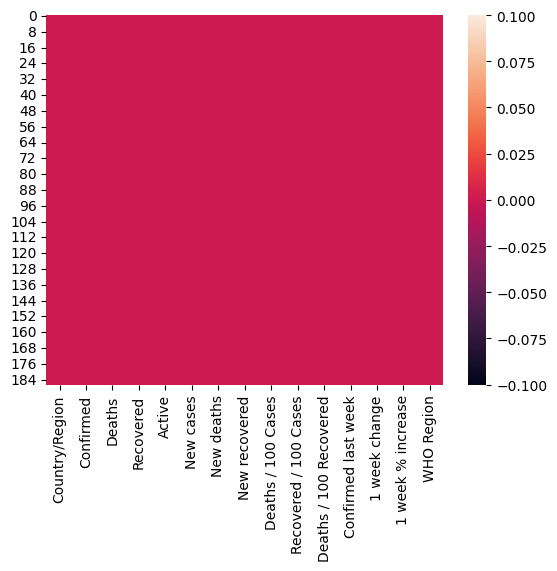

In [14]:
sns.heatmap(df.isnull())
plt.show()

In [15]:
df.isna().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

Text(0.5, 1.0, 'count of population')

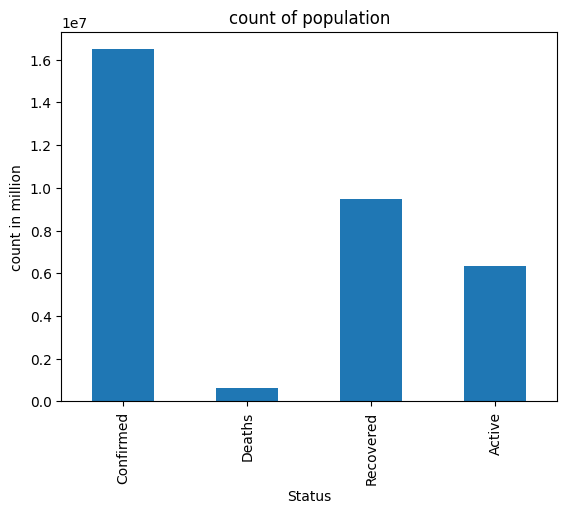

In [16]:
status_count=['Confirmed','Deaths','Recovered','Active']
colums_sum=df[status_count].sum().plot(kind='bar')
plt.xlabel('Status')
plt.ylabel('count in million')
plt.title('count of population')


In [17]:
Region=df.groupby(by='WHO Region').sum()
Region.head(4)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
WHO Region,,,,,,,,,,,,,,
Africa,AlgeriaAngolaBeninBotswanaBurkina FasoBurundiC...,723207,12223,440645,270339,12176,353,14563,110.71,2736.71,NaN,608120,115087,868.15
Americas,Antigua and BarbudaArgentinaBahamasBarbadosBel...,8839286,342732,4468616,4027938,129531,3555,94776,106.84,2180.20,NaN,7815198,1024088,571.59
Eastern Mediterranean,AfghanistanBahrainDjiboutiEgyptIranIraqJordanK...,1490744,38339,1201400,251005,12410,445,14843,78.39,1465.05,NaN,1398847,91897,230.61
Europe,AlbaniaAndorraArmeniaAustriaAzerbaijanBelarusB...,3299523,211144,1993723,1094656,22294,304,11732,235.11,3843.56,NaN,3146816,152707,435.10


Text(0.5, 1.0, 'Deaths in WHO regions')

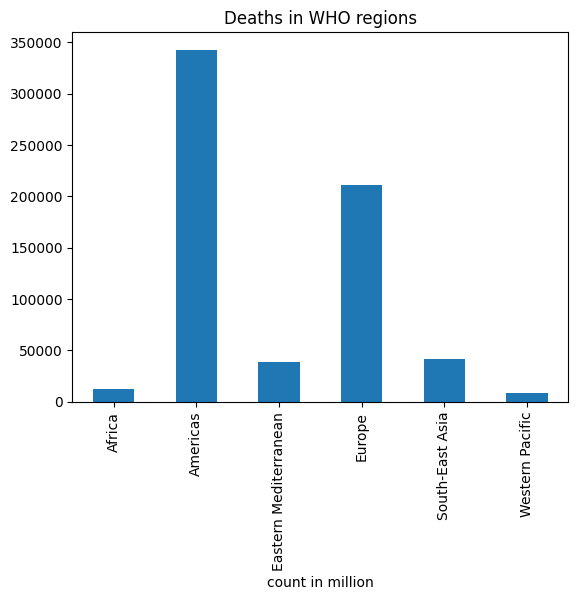

In [18]:
Region['Deaths'].plot(kind='bar')
plt.xlabel('WHO region')
plt.xlabel('count in million')
plt.title('Deaths in WHO regions')

Text(0.5, 1.0, 'Confirmed in WHO regions')

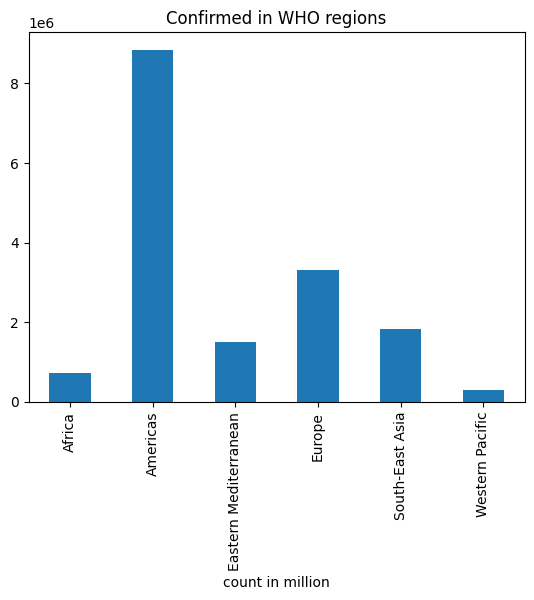

In [19]:
Region['Confirmed'].plot(kind='bar')
plt.xlabel('WHO region')
plt.xlabel('count in million')
plt.title('Confirmed in WHO regions')

Text(0.5, 1.0, 'Recovered in WHO regions')

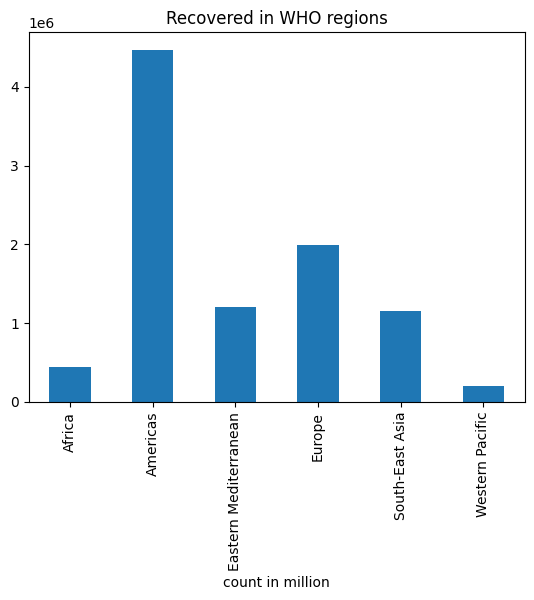

In [20]:
Region['Recovered'].plot(kind='bar')
plt.xlabel('WHO region')
plt.xlabel('count in million')
plt.title('Recovered in WHO regions')

Text(0.5, 1.0, 'active cases in WHO regions')

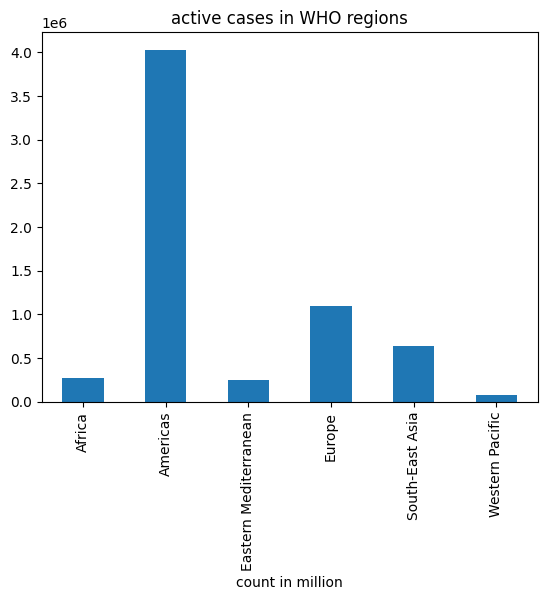

In [21]:
Region['Active'].plot(kind='bar')
plt.xlabel('WHO region')
plt.xlabel('count in million')
plt.title('active cases in WHO regions')

Text(0.5, 1.0, 'Confirmed Cases')

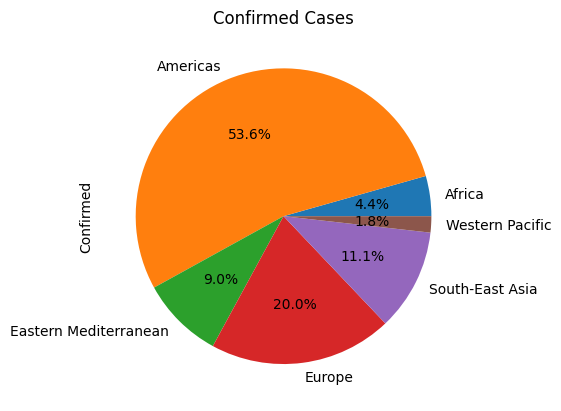

In [22]:
Region['Confirmed'].plot(kind='pie',autopct='%1.1f%%')
plt.title('Confirmed Cases')

Text(0.5, 1.0, 'Active Cases')

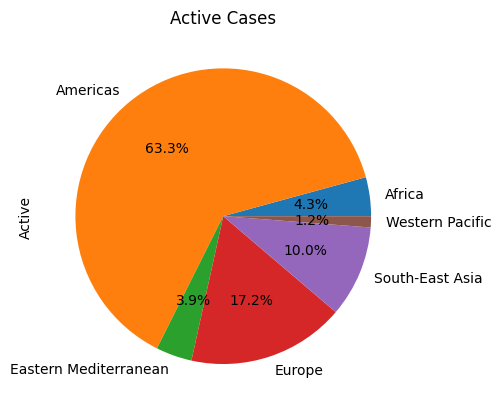

In [23]:
Region['Active'].plot(kind='pie',autopct='%1.1f%%')
plt.title('Active Cases')

Text(0.5, 1.0, 'Deaths Cases')

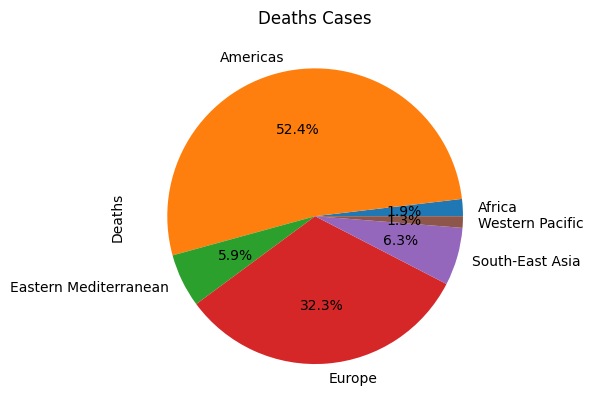

In [24]:
Region['Deaths'].plot(kind='pie',autopct='%1.1f%%')
plt.title('Deaths Cases')

Text(0.5, 1.0, 'Recovered Cases')

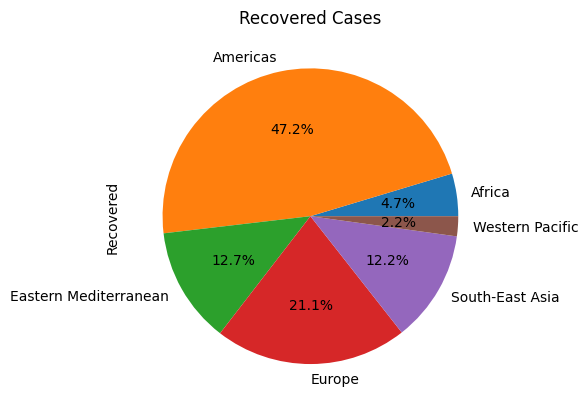

In [25]:
Region['Recovered'].plot(kind='pie',autopct='%1.1f%%')
plt.title('Recovered Cases')

<function matplotlib.pyplot.show(close=None, block=None)>

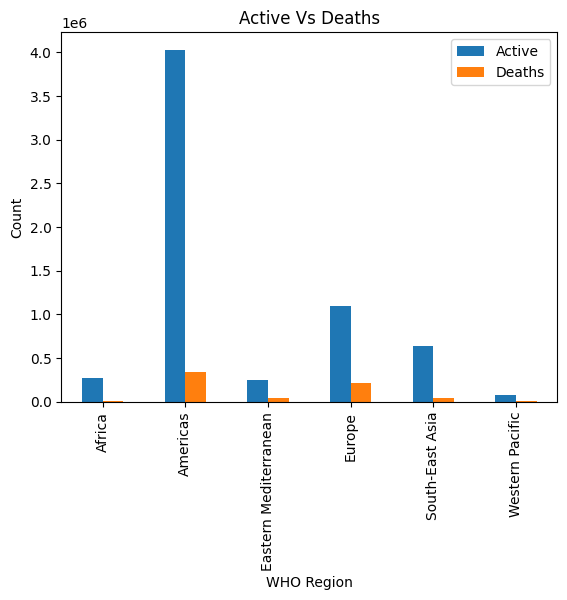

In [26]:
Region[['Active','Deaths']].plot(kind='bar')
plt.ylabel('Count')
plt.title('Active Vs Deaths' )
plt.show

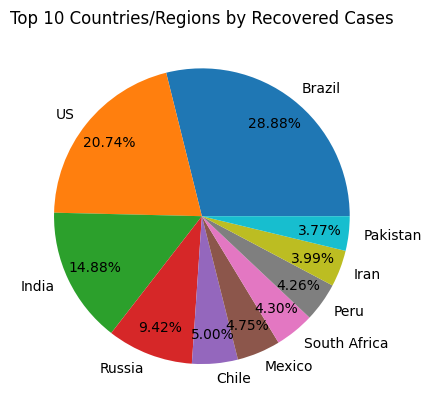

In [27]:
top_recovered = df.sort_values(by='Recovered', ascending=False)[:10]
plt.pie(top_recovered['Recovered'], labels=top_recovered['Country/Region'], autopct="%0.2f%%", pctdistance=0.8)
plt.title('Top 10 Countries/Regions by Recovered Cases')
plt.show()


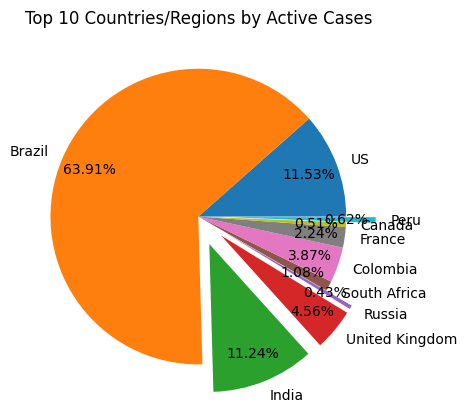

In [28]:
top_active = df.sort_values(by='Active', ascending=False)[:10]
plt.pie(top_recovered['Active'], labels=top_active['Country/Region'], autopct="%0.2f%%", pctdistance=0.8,explode=[0,0,0.2,0.2,0.2,0,0,0,0,0.2])
plt.title('Top 10 Countries/Regions by Active Cases')
plt.show()
